In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2022/9/25 14:05
# @Author  : Wang Yujia
# @File    : GT_asc_symmetry_gen_demo.ipynb
# @Description : Demo,试图（在对称条件下的）计算增加拍卖的 P与N

# 0. what for
1. Calculating trial for ascending-price in symmetry situation
2. `b` is bidfee,`s` is bidinc,`v` is valuation. And for ascending-price, there is $n \leq Q == \lfloor (v-b/s) \rfloor$
3. Eq1:
$$ u[i] = 1-b/(v-s*(i-1)),\ st. \ i \geq 1\ and\ i \leq Q $$
4. According to Chain Rule, there is Eq2:
$$ p(Duration(or\ 'n') = i) = (1-u[i+1])*u[i]*[i-1]..*u[1] $$
5. `u`可以利用setting值计算，计算`p`之前必须先计算出`u`

# 1. Calculating trial for ascending-price in symmetry situation
1. `b` is bidfee,`s` is bidinc,`v` is valuation. And for ascending-price, there is $n \leq Q == \lfloor (v-b/s) \rfloor$
2. Eq1:
$$ u[i] = 1-b/(v-s*(i-1)),\ st. \ i \geq 1\ and\ i \leq Q $$
3. According to Chain Rule, there is Eq2:
$$ p(Duration(or\ 'n') = i) = (1-u[i+1])*u[i]*[i-1]..*u[1] $$
4. `u`可以利用setting值计算，计算`p`之前必须先计算出`u`

# 1. Preparations
1. Setting设置：`b` is bidfee,`s` is bidinc,`v` is valuation.
2. 注意这里`b`和`s`的相对关系决定了最后那个ditrb.图的走向和`n`的关系，当`b==s`时，是一条直线

In [2]:
# setting
b = 0.6   # bid fee
s = 0.12  # bid increment
v = 30    # valuation
p = 10    # p is for fixed-price

# A not that good but toy example
#b = 10
#s = 20
#v = 50
import numpy as np
import seaborn as sns

# 2. Q
1. 计算`Q`. For ascending-price, there is $n \leq Q $

In [3]:
Q = np.int(np.floor((v-b)/s))
#TODO： 合理性判断的assert
print("Q is : ", Q)

Q is :  245


AttributeError: 'int' object has no attribute 'median'

# 3.U
1. 计算`u`，注意边界值取值问题：根据公式可知`u[0]`不存在，指定为0
2. `u`一共有`Q+1`个有效数字，index从`1`开始编码，因此`u`的长度为`Q+2`

In [54]:
u=[0]*(Q+2)
u[0] = 1
for i in range(1,Q+2):
    u[i] = 1-b/(v-s*(i-1))

print("u is like: ", u)

u is like:  [1, 0.98, 0.9799196787148594, 0.9798387096774194, 0.979757085020243, 0.9796747967479675, 0.9795918367346939, 0.9795081967213115, 0.9794238683127572, 0.9793388429752066, 0.979253112033195, 0.9791666666666666, 0.9790794979079498, 0.9789915966386554, 0.9789029535864979, 0.978813559322034, 0.9787234042553191, 0.9786324786324786, 0.9785407725321889, 0.978448275862069, 0.9783549783549783, 0.9782608695652174, 0.9781659388646288, 0.9780701754385965, 0.9779735682819384, 0.9778761061946902, 0.9777777777777777, 0.9776785714285714, 0.9775784753363229, 0.9774774774774775, 0.9773755656108597, 0.9772727272727273, 0.9771689497716896, 0.9770642201834863, 0.9769585253456221, 0.9768518518518519, 0.9767441860465116, 0.9766355140186916, 0.9765258215962441, 0.9764150943396226, 0.976303317535545, 0.9761904761904762, 0.9760765550239234, 0.9759615384615384, 0.9758454106280193, 0.9757281553398058, 0.975609756097561, 0.9754901960784313, 0.9753694581280788, 0.9752475247524752, 0.9751243781094527, 0.97

# 4. P
1. 计算`p`，注意起始位置是0,而且p[i] = (1-u[i+1])\*u[i]\*[i-1]..\*u[1]
2. `p`下标从`0`开始，最大可以到`Q`，此时`u`访问到最大下标`Q+1`。因此`p`的大小 == `p`的有效大小 == `Q+1`
3. `p`和`u`的有效长度都是`Q+1`，只不过`u`为了保持意义，下标从`1`开始

P is like:  [0.020000000000000018, 0.019678714859437778, 0.01936131623267261, 0.019047772649957252, 0.01873805276947012, 0.018432125377315575, 0.01812995938752347, 0.017831523842049876, 0.017536787910776345, 0.01724572089151034, 0.016958292209985168, 0.016674471419859862, 0.01639422820271939, 0.01611753236807428, 0.015844353853361144, 0.015574662723942295, 0.01530842917310568, 0.015045623522065205, 0.01478621621996065, 0.014530177843857454, 0.01427747909874685, 0.014028090817546073, 0.013781983961097836, 0.013539129618170997, 0.013299499005460057, 0.013063063467585212, 0.012829794477092617, 0.012599663634454139, 0.0123726426680676, 0.012148703434256442, 0.011927817917269934, 0.01170995822928325, 0.011495096610397335, 0.011283205428638877, 0.01107425717996037, 0.010868224488240201, 0.010665080105282398, 0.010464796910817026, 0.010267347912499744, 0.010072706245912059, 0.009880845174561354, 0.009691738089880749, 0.0095053585112292, 0.009321680085891427, 0.009140676589077999, 0.0089623219

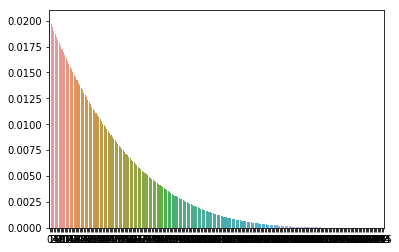

In [55]:
N = list(range(0,Q+1))
P=[0]*(Q+1)
tmp = 1
for i in range(0,(Q+1)):
    tmp = tmp*u[i]
    P[i] = (1-u[i+1])*tmp

# 5. 输出与绘图

In [ ]:
print("P is like: ", P)
print("And sum of P is:", np.sum(P))
print("The distrb. of P wrt. N is: \n")
sns.barplot(x = N,y=P)


5. 因此`P[n]`表示的是auction结束在第`n`轮的概率, 注意拍卖有可能结束在第`0`轮
6. 注意`P`的概率大小差别很大（比如8个数量级）
7. 可知$sum(P) =  1-\prod_{i=1}^{Q+1}u[i]$，$sum(P)$ 能不能等于1取决于$u$里，或者说$u[Q+1]$是否是0，which取决于$n \leq Q == \lfloor (v-b/s) \rfloor$ 公式中的$Q$本身是一个int还是取floor后的int

# 2. Calculating trial for fixed-price in symmetry situation
1. `b` is bidfee,`s` is bidinc which is `0` for fixed-price,`v` is valuation, `p` is the fixed price paid by winner and it could be `0`
2. Eq3:
    $$ u = 1-b/(v-p),\ st. \ v \geq p$$
3. 因此在setting确定的情况下，`u`为一个定值，只要$v \geq p$拍卖就可以一直进行下去，没有ascending-price的`Q`的限制
4. Eq4：

- 计算u: $$ u = 1-b/(v-p),\ st. \ v \geq p$$

In [15]:
u_fixed = 1-b/(v-p)
print("u is :", u_fixed)
print("Is p <= than v: ", (p<=v))


u is : 0.97
Is p <= than v:  True


- 计算P